<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-pulidoc/blob/master/Copy_of_L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

Claudia Pulido, Pair programming with Sara Adhikari


SUMMARY: In the design and implementation of the project, we aimed to closely follow the original code as much as possible. Although the final result was challenging to achieve, with an average of 8 hours spent programming, the end product was successfully completed. The initial design plan evolved significantly as we encountered several issues and had to adapt our approach to meet the lab requirements. Despite these hurdles, we managed to reach the desired outcome after extensive debugging and adjustments.

PERSONNEL: I worked with Sara as pair programmers throughout the project. We divided the sections of the project between us, ensuring that both of us took on each role to experience all aspects of the development process. Each section of the code clearly specifies our roles.

CHALLENGES: One of the biggest challenges was working with the URL function, which initially produced errors and even printed the file content twice. This required many trials and errors before resolving the issue. Ultimately, we were able to fix the problem by incorporating Dr. Pearce's approach and integrating it into our main function.

INNOVATIONS: The only innovation we included was output formatting in triple quoted string that was required on the doc by Dr. Nakazawa.

TESTING: Testing was performed using the files provided by Dr. Nakazawa. We verified the functionality of our implementation by running these files and checking if the output matched the expected results.

ERRORS:

-Issues with URL opening


-Problems with printing in triple quotes (resolved)

COMMENTS: This lab was quite challenging, especially since I hadn't fully coded in Python since 226. However, it was rewarding to refresh my skills. Pair programming with Sara was a highlight of the project;it allowed me to get immediate feedback and observe different approaches to problem-solving. I also enjoyed sharing my ideas with her on certain funtions and seeing what we could come up with as a pair. Overall, the experience was stressful but rewarding.

## Import Libraries

# **Our code completed:**

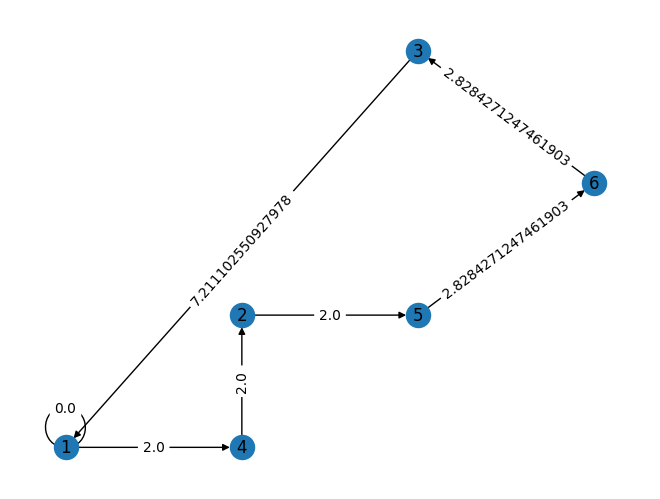

'''6
1 5
3 5
3 7
5 7
7 9
5 11
1 5
1 5
'''


In [ ]:
#Authors: Claudia Pulido and Sara Adhikari as pair programmers
#Acknowledgements: Dr. Jan Pearce, Generative AI, StackOverflow

import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

class TSP:
    def __init__(self):
        """Initialize the TSP class with default attributes."""
        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()  # Directed graph
        self.coords = {}
        self.route = []

    def extractData(self, data):
        """Extracts the number of vertices and their coordinates from the input data.

        Pair programming: Navigator was Clau and the driver was Sara
        """
        lines = data.strip().split('\n')
        self.dimension = int(lines[0].strip())  # First line: number of vertices
        for line in lines[1:]:
            x, y = map(int, line.strip().split())
            self.nodeData.append((len(self.nodeData) + 1, x, y))  # Store node and coordinates

    def setUpCoords(self):
        """Sets up the coordinates for each node in a dictionary as tuples.
        Pair programming : Driver was Sara and the navigator was Clau
        """
       # goes over each node in the list `self.nodeData`
        for node in self.nodeData:
            node_id = node[0]
            x_coord = node[1]
            y_coord = node[2]
            self.coords[node_id] = (x_coord, y_coord) # Store the coordinates  as a tuple in the dictionary `self.coords`with the node ID as the key

    def calculateDistance(self, a, b):
        """Calculates the distance between points a and then points b.
         Arguments:
        a (tuple): The coordinates of the first point as (x, y).
        b (tuple): The coordinates of the second point as (x, y).

    Returns:
        float: The distance between the two points using the distance formula

        Pair programming: Driver was Clau and the navigator was Sara

        """
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2) # first,calculates the squared difference between the x coordinates of the two points,
       # then, it calculates the squared difference between the y coordinates of the two points, and then finally
       # it gets the squared differences and take the square root to get the final distance


    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Computes the route using the greedy algorithm by making the list of nodes to be visited.
        Arguments:
        current (int): the id of the current node (starting point).
        visits (list) list of nodes that have been visited.
        nVisits (list): list of nodes that have not been visited. .
        needList (bool): flag indicating whether to initialize the list of nodes to visit.

        Pair programming: Driver was sara, and navigator was clau.

    """
        if needList:
            nVisits = self.listPlaces()  # starts the list of nodes that have not been visited yet

        while nVisits:
            visits.append(current)        # adds the current node to the list of visited nodes

            nVisits = self.cleanUpList(visits, nVisits)     # updates the list of nodes not visited by removing the nodes that have been visited


            if not nVisits:  # No more nodes to visit
                break

            # finds the nearest city
            nearest_city = min(nVisits, key=lambda x: self.calculateDistance(self.coords[current], self.coords[x]))
            self.route.append(nearest_city)
            current = nearest_city          # updates the current node to be the nearest node


        # Ensure that the route is properly completed
        if visits and visits[0] != current:
            self.route.append(visits[0])

    def beGreedy(self, start):
        """Executes the greedy algorithm to find the route.
    Arguments:
        start (int): The ID of the starting node for the route.
        Pair prog: Clau was the sriver and Sara was the navigator

    """
        self.route = [start] # starts the route with the starting node

        self.getRoute(start) # does the route using the greedy algorithm starting from the start node

        self.route.append(start)  # returns to the starting city to complete the tour

    def listPlaces(self):
        """Creates a list of all node ids from nodeData.
        pair programming: Sara was the driver and Clau was the navigator

        """
        return [node[0] for node in self.nodeData]

    def cleanUpList(self, visited, notVisited):
        """Removes items in visited from notVisited.

        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited

        Pair programming: this one we got it from the code already provided.
        """
        for item in visited: # goes over each item in the `visited` list
            if item in notVisited: # if the item is found in the `notVisited` list
                notVisited.remove(item)  # remove the item from the `notVisited` list

        return notVisited   # return the updated list of nodes that are still not visited

    def addNodes(self):
        """Adds nodes to the NetworkX graph."""
        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """adds edges to the NetworkX graph.
          pair programming: we got this one from the provided code as well.

        """
        x = 0
        while x < len(self.route) - 1:
            self.graph.add_edge(self.route[x], self.route[x + 1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x + 1]]))
            x += 1

    def showGraph(self):
        """shows the graph using the imported libraries we used.
        pair programming: it comes also from the original code written by Dr. Pearce

        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()


    def printTour(self):
        """Prints the tour in the required format.
        Pair programming: Clau was the driver and Sara the navigator
        """
        tour_string = f"'''{self.dimension}\n"
        for node in self.route: # goes over each node in the route
            x, y = self.coords[node] #gets the x and y coordinates of the current node from the coords dictionary
            tour_string += f"{x} {y}\n"
        tour_string += "'''"
        print(tour_string) # print the formatted tour string


def main():
    """
    Main function to execute the Traveling Salesperson Problem (TSP) solution.
    """
    tsp = TSP()

    # Extract data from the URL
    tspdata = urlopen("https://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)  # Starting node can be adjusted as needed
    tsp.addEdges()
    tsp.showGraph()
    tsp.printTour()  # Print the tour in the required format

if __name__ == "__main__":
    main()